<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Setup</a></span></li><li><span><a href="#Data-Download-and-Cleaning" data-toc-modified-id="Data-Download-and-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Download and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Understand-Ride-Types" data-toc-modified-id="Understand-Ride-Types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Understand Ride Types</a></span></li><li><span><a href="#Download-the-Data-&amp;-Clean-NA" data-toc-modified-id="Download-the-Data-&amp;-Clean-NA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Download the Data &amp; Clean NA</a></span></li><li><span><a href="#Collapse-Data-Into-Usable-Chunks" data-toc-modified-id="Collapse-Data-Into-Usable-Chunks-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Collapse Data Into Usable Chunks</a></span><ul class="toc-item"><li><span><a href="#Data-for-All-Ride-Types-For-Each-Station-and-Each-Week" data-toc-modified-id="Data-for-All-Ride-Types-For-Each-Station-and-Each-Week-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Data for All Ride Types For Each Station and Each Week</a></span></li><li><span><a href="#Data-for-All-Stations-For-Each-Ride-Type-and-Each-Week" data-toc-modified-id="Data-for-All-Stations-For-Each-Ride-Type-and-Each-Week-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Data for All Stations For Each Ride Type and Each Week</a></span></li><li><span><a href="#Data-for-All-Stations-and-All-Ride-Types-For-Each-Week" data-toc-modified-id="Data-for-All-Stations-and-All-Ride-Types-For-Each-Week-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Data for All Stations and All Ride Types For Each Week</a></span></li></ul></li><li><span><a href="#Create-a-Date-Index" data-toc-modified-id="Create-a-Date-Index-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Create a Date Index</a></span></li></ul></li><li><span><a href="#Event-Detection" data-toc-modified-id="Event-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Event Detection</a></span><ul class="toc-item"><li><span><a href="#Make-a-simple-plot-of-the-time-data-to-see-macro-level-trends" data-toc-modified-id="Make-a-simple-plot-of-the-time-data-to-see-macro-level-trends-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Make a simple plot of the time data to see macro level trends</a></span></li><li><span><a href="#What-happened-around-the-end-of-October-2012-in-NYC?" data-toc-modified-id="What-happened-around-the-end-of-October-2012-in-NYC?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>What happened around the end of October 2012 in NYC?</a></span></li><li><span><a href="#Look-for-statistical-proof-of-an-event" data-toc-modified-id="Look-for-statistical-proof-of-an-event-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Look for statistical proof of an event</a></span><ul class="toc-item"><li><span><a href="#Find-the-mean,-standard-deviation,-minimum,-and-maximum-of-ridership" data-toc-modified-id="Find-the-mean,-standard-deviation,-minimum,-and-maximum-of-ridership-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Find the mean, standard deviation, minimum, and maximum of ridership</a></span></li><li><span><a href="#Find-the-Z-Score-of-the-Minimum-Point-and-See-How-Many-Standard-Deviations-It-Is-Below" data-toc-modified-id="Find-the-Z-Score-of-the-Minimum-Point-and-See-How-Many-Standard-Deviations-It-Is-Below-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Find the Z Score of the Minimum Point and See How Many Standard Deviations It Is Below</a></span></li></ul></li><li><span><a href="#Let's-Make-a-Nicer-Plot-Showing-3-Standard-Deviations-Cut-Off" data-toc-modified-id="Let's-Make-a-Nicer-Plot-Showing-3-Standard-Deviations-Cut-Off-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Let's Make a Nicer Plot Showing 3 Standard Deviations Cut Off</a></span></li></ul></li><li><span><a href="#Trends-&amp;-Stationarity" data-toc-modified-id="Trends-&amp;-Stationarity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trends &amp; Stationarity</a></span><ul class="toc-item"><li><span><a href="#Familiarize-again-with-ride-types-and-data" data-toc-modified-id="Familiarize-again-with-ride-types-and-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Familiarize again with ride types and data</a></span></li><li><span><a href="#Plot-each-of-the-different-types-of-rides" data-toc-modified-id="Plot-each-of-the-different-types-of-rides-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot each of the different types of rides</a></span></li><li><span><a href="#See-if-any-of-these-are-trending-upwards-or-downwards" data-toc-modified-id="See-if-any-of-these-are-trending-upwards-or-downwards-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>See if any of these are trending upwards or downwards</a></span></li><li><span><a href="#Check-for-trends-using-a-ratio-of-first-two-months-against-last-two-month-ridership" data-toc-modified-id="Check-for-trends-using-a-ratio-of-first-two-months-against-last-two-month-ridership-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Check for trends using a ratio of first two months against last two month ridership</a></span></li><li><span><a href="#Check-for-trends-using-a-rolling-mean-and-standard-deviation" data-toc-modified-id="Check-for-trends-using-a-rolling-mean-and-standard-deviation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Check for trends using a rolling mean and standard deviation</a></span></li></ul></li><li><span><a href="#Periodicity" data-toc-modified-id="Periodicity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Periodicity</a></span></li></ul></div>

## Notebook Setup

In [103]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os, urllib
from datetime import datetime

%matplotlib inline

## Data Download and Cleaning

### Understand Ride Types

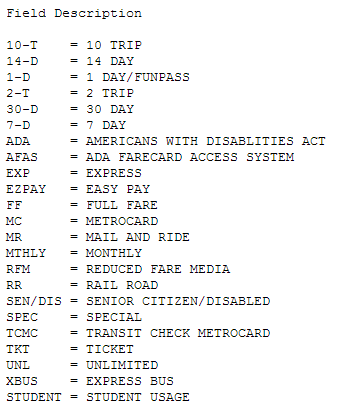

In [8]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [119]:
rideTypes = np.array(["10 TRIP","14 DAY","1 DAY","2 TRIP","30 DAY", "7 DAY", "ADA", "AFAS",
                              "EXPRESS", "EZPAY", "FULL FARE", "METROCARD", "MAIL AND RIDE", "MONTHLY",
                              "REDUCED FARE MEDIA", "RAILROAD", "SENIOR", "SPECIAL", "TRANSIT CHECK",
                     "TICKET", "UNLIMITED", "EXPRESS BUS", "STUDENT USAGE"])

In [120]:
rideTypes

array(['10 TRIP', '14 DAY', '1 DAY', '2 TRIP', '30 DAY', '7 DAY', 'ADA',
       'AFAS', 'EXPRESS', 'EZPAY', 'FULL FARE', 'METROCARD',
       'MAIL AND RIDE', 'MONTHLY', 'REDUCED FARE MEDIA', 'RAILROAD',
       'SENIOR', 'SPECIAL', 'TRANSIT CHECK', 'TICKET', 'UNLIMITED',
       'EXPRESS BUS', 'STUDENT USAGE'],
      dtype='<U18')

### Download the Data & Clean NA

In [6]:
url = 'https://s3.amazonaws.com/aws-website-seanandrewchen-repository-40es3/pui2017_data/MTA_Fare.npy'
fileName = "MTA_Fare.npy"
urllib.request.urlretrieve(url, fileName);

In [7]:
mtaData = np.load('MTA_Fare.npy')
mtaData.shape

(600, 23, 194)

In [17]:
type(mtaData[0][0][0])

numpy.int32

In [18]:
mtaData = mtaData.astype('float')

In [19]:
mtaData[mtaData == -1] = np.nan

### Collapse Data Into Usable Chunks

#### Data for All Ride Types For Each Station and Each Week

In [24]:
stationData = np.nansum(mtaData, axis = 1)

In [26]:
stationData.shape

(600, 194)

#### Data for All Stations For Each Ride Type and Each Week

In [27]:
riderData = np.nansum(mtaData, axis = 0)

In [28]:
riderData.shape

(23, 194)

#### Data for All Stations and All Ride Types For Each Week

In [29]:
timeData = np.nansum(riderData, axis = 0)

In [30]:
timeData.shape

(194,)

### Create a Date Index

In [71]:
dateIndex = [np.datetime64('2010-05-21')]

#There are 194 weeks in the data but from 2010-05-21 to 2014-02-21 is actually 196 weeks...
for i in range(0, 193):
    dateIndex.append(dateIndex[i] + np.timedelta64(7,'D'))  

In [72]:
dateIndex

[numpy.datetime64('2010-05-21'),
 numpy.datetime64('2010-05-28'),
 numpy.datetime64('2010-06-04'),
 numpy.datetime64('2010-06-11'),
 numpy.datetime64('2010-06-18'),
 numpy.datetime64('2010-06-25'),
 numpy.datetime64('2010-07-02'),
 numpy.datetime64('2010-07-09'),
 numpy.datetime64('2010-07-16'),
 numpy.datetime64('2010-07-23'),
 numpy.datetime64('2010-07-30'),
 numpy.datetime64('2010-08-06'),
 numpy.datetime64('2010-08-13'),
 numpy.datetime64('2010-08-20'),
 numpy.datetime64('2010-08-27'),
 numpy.datetime64('2010-09-03'),
 numpy.datetime64('2010-09-10'),
 numpy.datetime64('2010-09-17'),
 numpy.datetime64('2010-09-24'),
 numpy.datetime64('2010-10-01'),
 numpy.datetime64('2010-10-08'),
 numpy.datetime64('2010-10-15'),
 numpy.datetime64('2010-10-22'),
 numpy.datetime64('2010-10-29'),
 numpy.datetime64('2010-11-05'),
 numpy.datetime64('2010-11-12'),
 numpy.datetime64('2010-11-19'),
 numpy.datetime64('2010-11-26'),
 numpy.datetime64('2010-12-03'),
 numpy.datetime64('2010-12-10'),
 numpy.dat

Because there are 194 weeks but there are 196 weeks between the two dates, I suspect that either each date represents data from the week until that day or the week from that day on. But since they say the data ends on 2014-02-21 and 196 index points brings us to 2014-02-14, I will say that each date point represents a week starting from that date.

In [90]:
#Convert this to a Datetime type from datetime64 for the sake of plotting
for i in range(len(dateIndex)):
    dateIndex[i] = dateIndex[i].astype(datetime)

In [91]:
dateIndex

[datetime.date(2010, 5, 21),
 datetime.date(2010, 5, 28),
 datetime.date(2010, 6, 4),
 datetime.date(2010, 6, 11),
 datetime.date(2010, 6, 18),
 datetime.date(2010, 6, 25),
 datetime.date(2010, 7, 2),
 datetime.date(2010, 7, 9),
 datetime.date(2010, 7, 16),
 datetime.date(2010, 7, 23),
 datetime.date(2010, 7, 30),
 datetime.date(2010, 8, 6),
 datetime.date(2010, 8, 13),
 datetime.date(2010, 8, 20),
 datetime.date(2010, 8, 27),
 datetime.date(2010, 9, 3),
 datetime.date(2010, 9, 10),
 datetime.date(2010, 9, 17),
 datetime.date(2010, 9, 24),
 datetime.date(2010, 10, 1),
 datetime.date(2010, 10, 8),
 datetime.date(2010, 10, 15),
 datetime.date(2010, 10, 22),
 datetime.date(2010, 10, 29),
 datetime.date(2010, 11, 5),
 datetime.date(2010, 11, 12),
 datetime.date(2010, 11, 19),
 datetime.date(2010, 11, 26),
 datetime.date(2010, 12, 3),
 datetime.date(2010, 12, 10),
 datetime.date(2010, 12, 17),
 datetime.date(2010, 12, 24),
 datetime.date(2010, 12, 31),
 datetime.date(2011, 1, 7),
 datetime.

## Event Detection

### Make a simple plot of the time data to see macro level trends

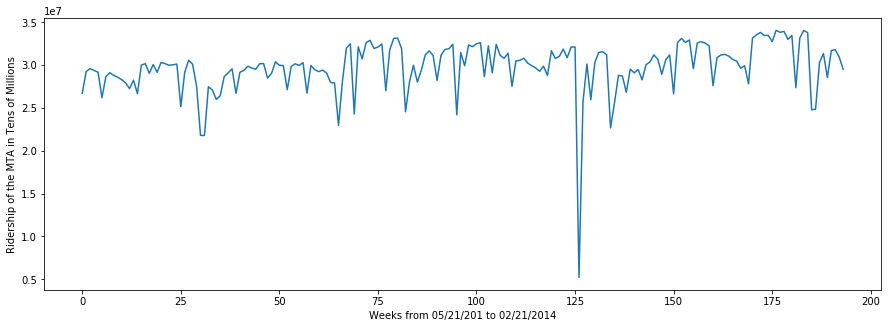

In [104]:
plt.figure(figsize = (15, 5))
plt.plot(range(len(timeData)),timeData)
plt.xlabel("Weeks from 05/21/201 to 02/21/2014")
plt.ylabel("Ridership of the MTA in Tens of Millions")
plt.show()

**Figure 3.1.1:** Ridership of the MTA from 05/21/2010 to 02/21/2014 in Weeks

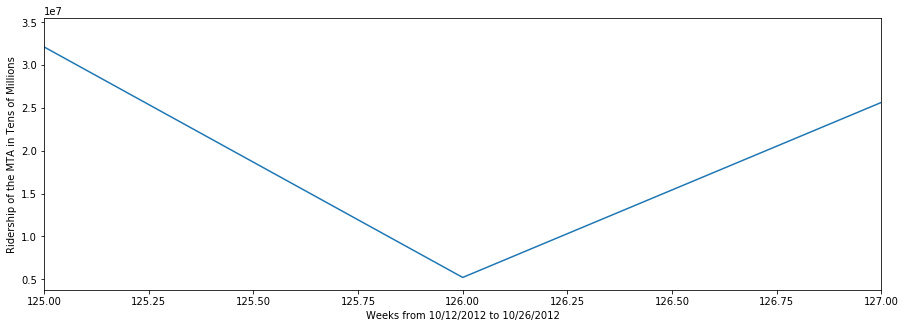

In [105]:
plt.figure(figsize = (15, 5))
plt.plot(range(len(timeData)),timeData)
plt.xlim(125,127)
plt.xlabel("Weeks from 10/12/2012 to 10/26/2012")
plt.ylabel("Ridership of the MTA in Tens of Millions")
plt.show()

**Figure 3.1.2:** Ridership of the MTA from 10/12/2012 to 10/26/201 in Weeks

In [94]:
dateIndex[126]

datetime.date(2012, 10, 19)

An event occurred in NYC sometime between 2012-10-19 to 2012-10-28.

### What happened around the end of October 2012 in NYC?

A brief Google search shows that on October 28, 2012, the Subway was shut down in preparation for the landing of Hurricane Sandy on the order of the governor. You can read more about it [here from the WSJ](https://www.wsj.com/articles/SB10001424052970204840504578084582421401190) (warning: paywall).

### Look for statistical proof of an event 

#### Find the mean, standard deviation, minimum, and maximum of ridership

In [60]:
ridershipMean = timeData.mean()
ridershipSTD = timeData.std()
ridershipMax = timeData.max()
ridershipMin = timeData.min()

In [63]:
print("Ridership Average is {}".format(ridershipMean))
print("Ridership Standard Deviation is {}".format(ridershipSTD))
print("Ridership Max is {}".format(ridershipMax))
print("Ridership Min is {}".format(ridershipMin))

Ridership Average is 29781349.87113402
Ridership Standard Deviation is 2983960.421700886
Ridership Max is 34071477.0
Ridership Min is 5218686.0


#### Find the Z Score of the Minimum Point and See How Many Standard Deviations It Is Below

In [66]:
minpointScore = (ridershipMin - ridershipMean) / ridershipSTD
print("The minimum point is {} z-scores below the mean.".format(minpointScore))

The minimum point is -8.231564900292165 z-scores below the mean.


### Let's Make a Nicer Plot Showing 3 Standard Deviations Cut Off

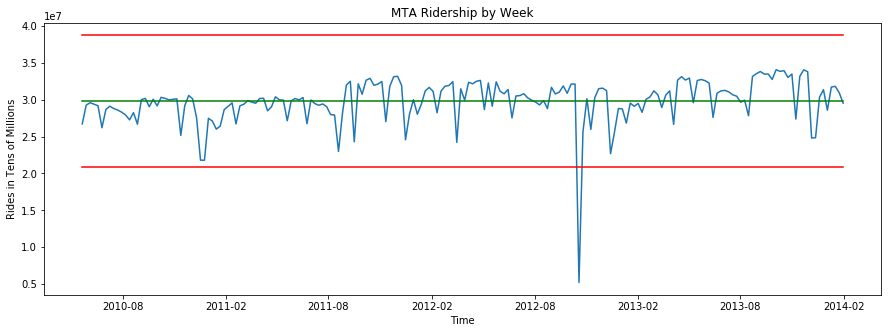

In [107]:
plt.figure(figsize = (15, 5))
plt.plot(dateIndex,timeData)
plt.plot(dateIndex,[ridershipMean - 3 * ridershipSTD] * 194, color='red')
plt.plot(dateIndex, [ridershipMean] * 194, color='green')
plt.plot(dateIndex,[ridershipMean + 3 * ridershipSTD] * 194, color='red')
plt.xlabel('Time')
plt.ylabel('Rides in Tens of Millions')
plt.title('MTA Ridership by Week')
plt.show()

**Figure 3.4.1:** Total Ridership of the MTA from 05/21/2010 to 02/21/2014. The red bands represent three standard deviations above and below the mean which is represented by the green band. 

## Trends & Stationarity

### Familiarize again with ride types and data

In [121]:
rideTypes

array(['10 TRIP', '14 DAY', '1 DAY', '2 TRIP', '30 DAY', '7 DAY', 'ADA',
       'AFAS', 'EXPRESS', 'EZPAY', 'FULL FARE', 'METROCARD',
       'MAIL AND RIDE', 'MONTHLY', 'REDUCED FARE MEDIA', 'RAILROAD',
       'SENIOR', 'SPECIAL', 'TRANSIT CHECK', 'TICKET', 'UNLIMITED',
       'EXPRESS BUS', 'STUDENT USAGE'],
      dtype='<U18')

In [99]:
riderData.shape

(23, 194)

### Plot each of the different types of rides

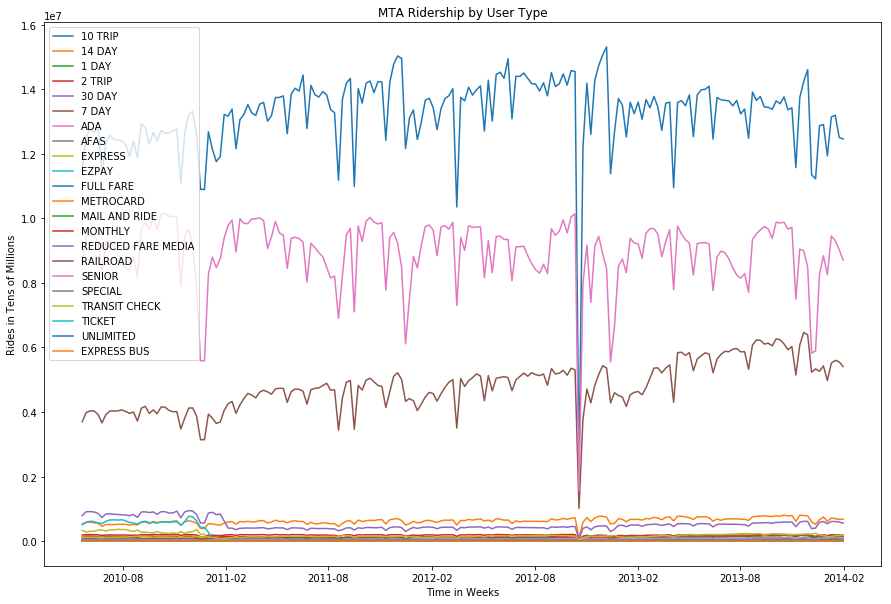

In [122]:
plt.figure(figsize=(15,10))

for i in range(0,22):
    plt.plot(dateIndex, riderData[i])
    
plt.title('MTA Ridership by User Type')
plt.xlabel('Time in Weeks')
plt.ylabel('Rides in Tens of Millions')
plt.legend(rideTypes)
plt.show;

**Figure 4.2.1:** Ridership of the MTA by User Type from 05/21/2010 to 02/21/2014

This is a bit busy so let us separate the top three from the rest into two different plots.

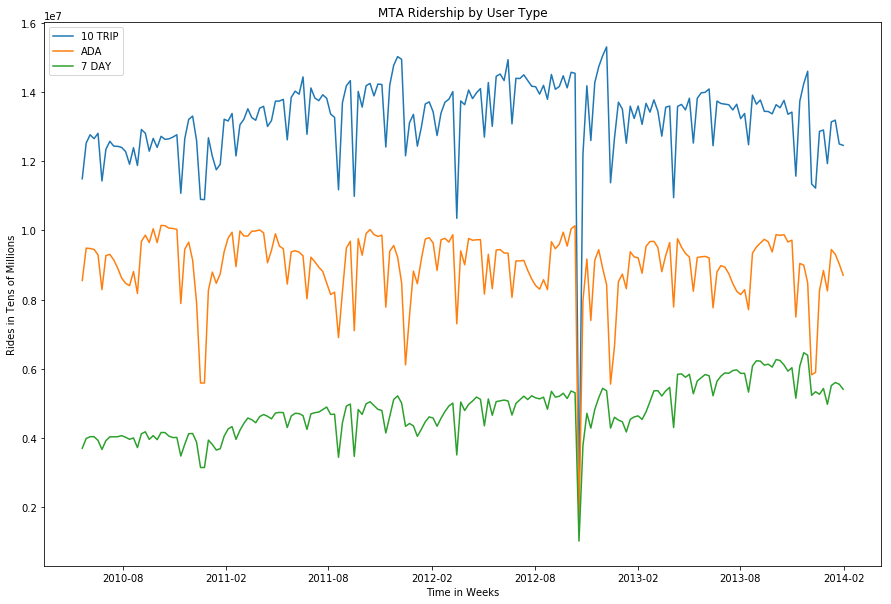

In [135]:
topRiderData = riderData[[0, 6, 5], :]
topRiderTypes = rideTypes[[0, 6, 5]]

plt.figure(figsize=(15,10))

for i in range(len(topRiderData)):
    plt.plot(dateIndex, topRiderData[i])
    
plt.title('MTA Ridership by User Type')
plt.xlabel('Time in Weeks')
plt.ylabel('Rides in Tens of Millions')
plt.legend(topRiderTypes)
plt.show;

**Figure 4.2.2:** Ridership of the MTA for 10 Day Trip, ADA, and 7 Day Trip Cards

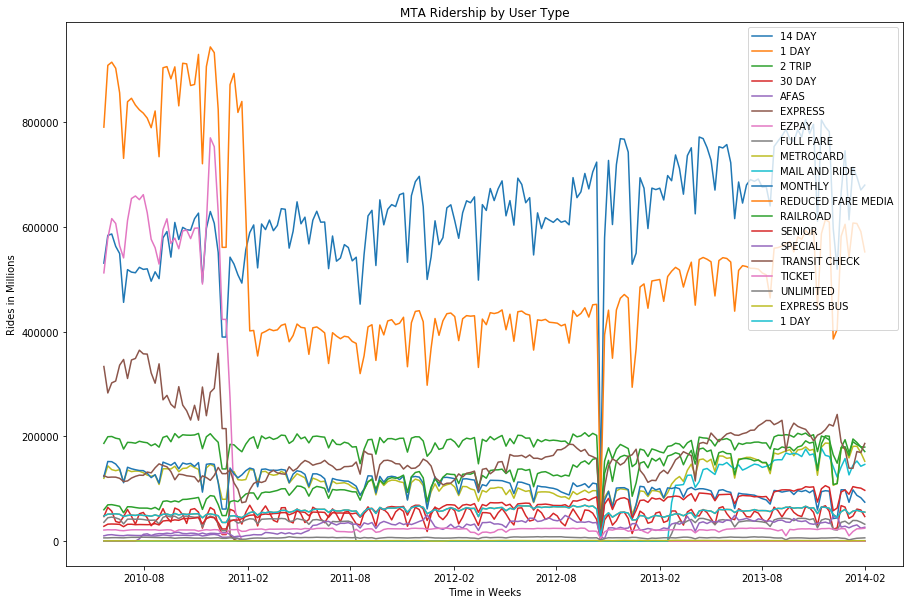

In [137]:
otherRiderData = riderData[[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
          19, 20, 21, 2], :]
otherRiderTypes = rideTypes[[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
          19, 20, 21, 2]]

plt.figure(figsize=(15,10))

for i in range(len(otherRiderData)):
    plt.plot(dateIndex, otherRiderData[i])
    
plt.title('MTA Ridership by User Type')
plt.xlabel('Time in Weeks')
plt.ylabel('Rides in Millions')
plt.legend(otherRiderTypes)
plt.show;

**Figure 4.2.3:** Ridership of the MTA for All Other Card Types

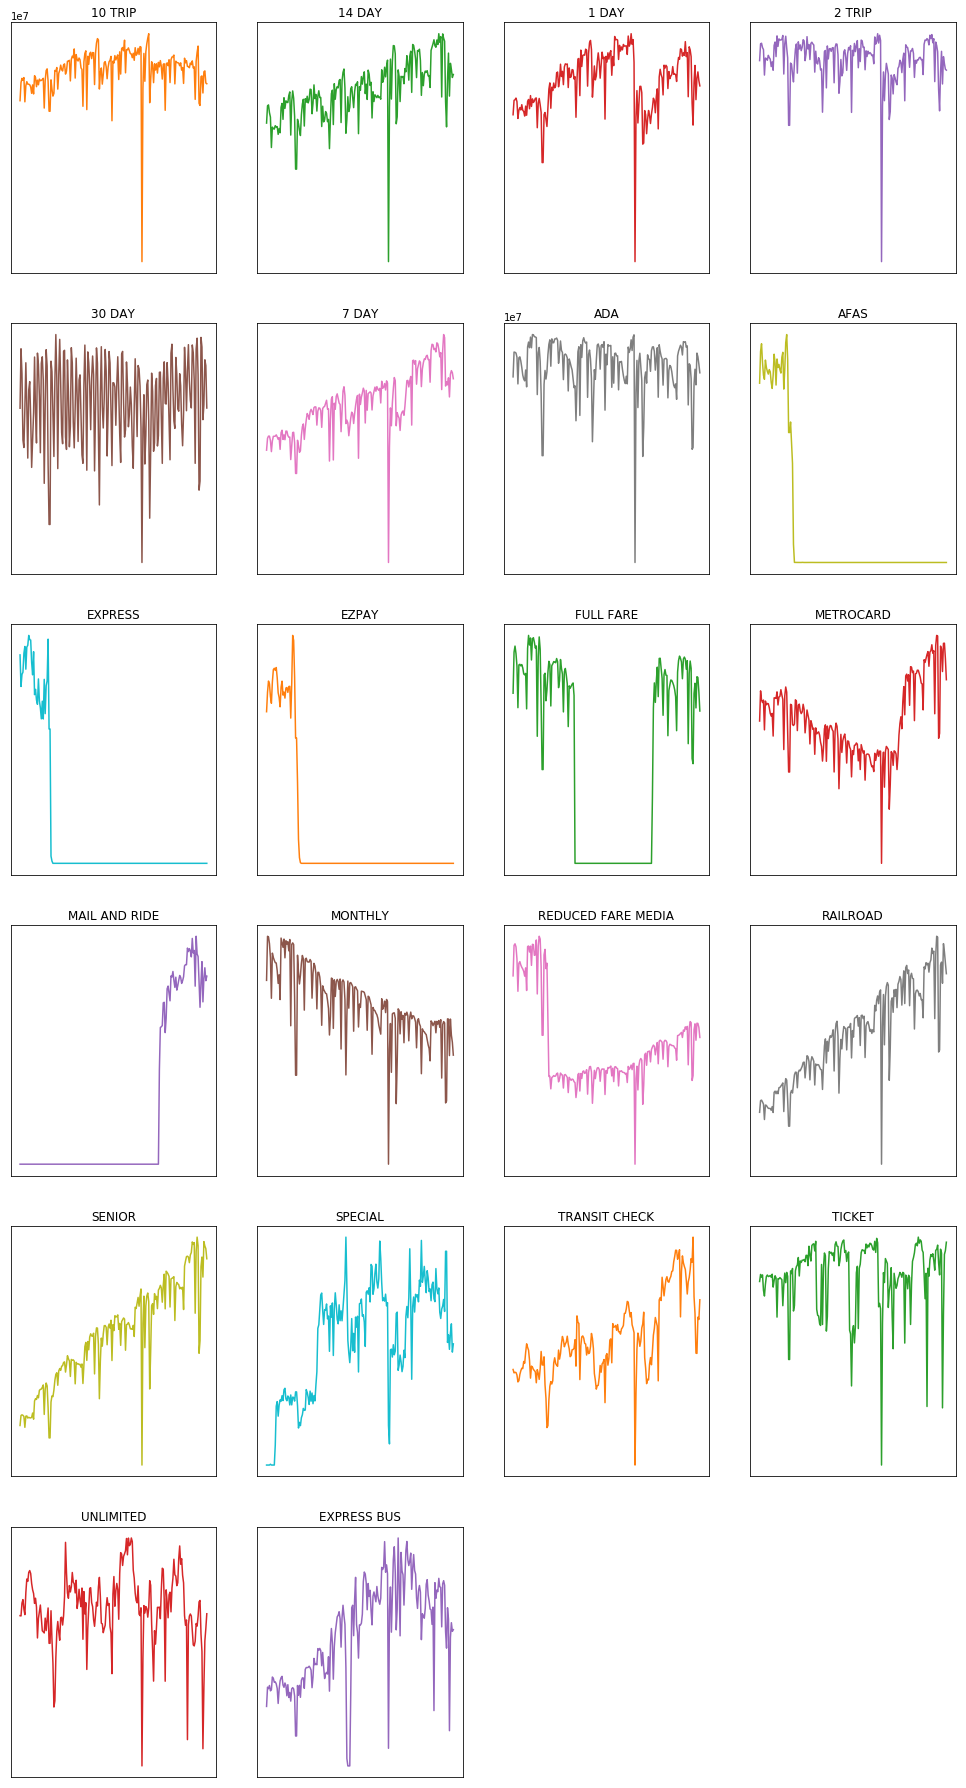

In [166]:
fig, axs = plt.subplots(6,4, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(top=5, right=1)
                    
axs = axs.ravel()

colors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
         'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
         'C1', 'C2', 'C3', 'C4', 'C5']

for i in range(0, 22):
    axs[i].plot(dateIndex, riderData[i], colors[i])
    axs[i].set_title(rideTypes[i])
    axs[i].tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')

fig.delaxes(axs[22])
fig.delaxes(axs[23])


**Figure 4.2.4:** Plots of all ride types over time. Total rides and time are removed for ease of viewing. Plot is simple to show if there are generalizeable trends.

### See if any of these are trending upwards or downwards

We will use the Augmented Dickey-Fuller test to see if there is stationarity or a trend. The test poses a null hypothesis that there is a unit root. The larger the negative test statistic, the stronger the rejection of this hypothesis. We state our $\alpha$ as 0.05.

In [188]:
adfPvalues = []
adfScores = []

for i in range(22):
    adfScores.append(sm.tsa.adfuller(riderData[i])[0])
    adfPvalues.append(sm.tsa.adfuller(riderData[i])[1])

adfOutcomes = pd.DataFrame(list(zip(rideTypes, adfScores, adfPvalues)))  
adfOutcomes.columns = ['Ride Type', 'ADF Score', 'ADF P-Value']

In [189]:
adfOutcomes

,Ride Type,ADF Score,ADF P-Value
0,10 TRIP,-11.325962,1.143363e-20
1,14 DAY,-2.155192,2.229081e-01
2,1 DAY,-2.129565,2.327939e-01
3,2 TRIP,-9.921236,2.987132e-17
4,30 DAY,-3.938128,1.771490e-03
5,7 DAY,-1.515413,5.258733e-01
6,ADA,-9.545080,2.662643e-16
7,AFAS,-2.630372,8.688103e-02
8,EXPRESS,-3.021143,3.296651e-02
9,EZPAY,-2.487842,1.184605e-01


In [193]:
significantOutcomes = adfOutcomes[adfOutcomes['ADF P-Value'] < 0.05]

In [194]:
significantOutcomes

,Ride Type,ADF Score,ADF P-Value
0,10 TRIP,-11.325962,1.143363e-20
3,2 TRIP,-9.921236,2.987132e-17
4,30 DAY,-3.938128,1.771490e-03
6,ADA,-9.545080,2.662643e-16
8,EXPRESS,-3.021143,3.296651e-02
18,TRANSIT CHECK,-2.967348,3.805824e-02
19,TICKET,-8.145347,1.002372e-12
20,UNLIMITED,-6.312771,3.204376e-08


### Check for trends using a ratio of first two months against last two month ridership

In [202]:
ridershipRatio = []

for i in range(22):
    firstWeeks = np.average(riderData[i][0:8])
    lastWeeks = np.average(riderData[i][-8:])
    ridershipRatio.append(firstWeeks / lastWeeks)
    
ridershipOutcomes = pd.DataFrame(list(zip(rideTypes, adfScores, adfPvalues, ridershipRatio)))
ridershipOutcomes.columns = ['Ride Type', 'ADF Score', 'ADF P-Value', 'Ratio of First to Last Month']

In [203]:
ridershipOutcomes

,Ride Type,ADF Score,ADF P-Value,Ratio of First to Last Month
0,10 TRIP,-11.325962,1.143363e-20,0.983926
1,14 DAY,-2.155192,2.229081e-01,0.811079
2,1 DAY,-2.129565,2.327939e-01,0.905938
3,2 TRIP,-9.921236,2.987132e-17,1.075034
4,30 DAY,-3.938128,1.771490e-03,0.949183
5,7 DAY,-1.515413,5.258733e-01,0.726465
6,ADA,-9.545080,2.662643e-16,1.079523
7,AFAS,-2.630372,8.688103e-02,4917.555556
8,EXPRESS,-3.021143,3.296651e-02,91502.321429
9,EZPAY,-2.487842,1.184605e-01,585212.000000


Let's set a 25% increase or decrease as a standard.

In [208]:
significantOutcomes = ridershipOutcomes[ridershipOutcomes['ADF P-Value'] < 0.05]
significantOutcomes = significantOutcomes[(significantOutcomes['Ratio of First to Last Month'] > 1.25) | (significantOutcomes['Ratio of First to Last Month'] < .75)]
significantOutcomes

,Ride Type,ADF Score,ADF P-Value,Ratio of First to Last Month
8,EXPRESS,-3.021143,3.296651e-02,91502.321429
18,TRANSIT CHECK,-2.967348,3.805824e-02,0.680504
20,UNLIMITED,-6.312771,3.204376e-08,1.263613


### Check for trends using a rolling mean and standard deviation

In [213]:
riderDataframe = pd.DataFrame(riderData)

## Periodicity

In [209]:
stationData.shape

(600, 194)

First, de-trend the series by fitting the time series to a linear (a+bx), or its log to a linear series.  Straight statistical curve fitting.

Second, take the series of original series and subtract it from the time series which you constructed (whether you use the log of the data  or straight data - whichever fits best). Quantify this using goodness-of-fit stats which show variance.   That will give you a quasi-seasonalized or a series showing the periodicity characteristics ( if any)  of the data.

Third, fit THAT data to a sine curve using a standard quadratic least squares technique, solving for the periodicity with the least total variation.  The Fourier method assumes that the whole pattern repeats at a specific interval, which is not often the case.

### 